### Joslin

* [Dataset]

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings/joslin/'
COLUMN = 'embeddings'

In [3]:
text_path, images_path = 'text_embeddings.csv', 'Embeddings_dinov2_base.csv' # os.listdir(PATH)

## Get data

### Text

In [4]:
text = pd.read_csv(os.path.join(PATH, text_path))
text

,ID,EYE_DR,text,DR_2,DR_3,split,embeddings
0,41346,0,An image from the right eye of a female patien...,0,0,train,"[1.3471554517745972, 1.139153242111206, 1.5056..."
1,86312,0,"An image from the right eye of a male patient,...",0,0,test,"[1.8503162860870361, 0.5644216537475586, 1.464..."
2,161175,0,An image from the right eye of a female patien...,0,0,train,"[0.9403452277183533, 0.9413067102432251, 2.062..."
3,185158,0,"An image from the right eye of a male patient,...",0,0,train,"[1.1024888753890991, 0.672754168510437, 1.3605..."
4,65272,0,"An image from the left eye of a male patient, ...",0,0,train,"[0.9231529831886292, 0.5652403831481934, 1.419..."
...,...,...,...,...,...,...,...
1788,92630,4,"An image from the right eye of a male patient,...",1,2,train,"[1.1933932304382324, 0.8763606548309326, 1.478..."
1789,176584,4,"An image from the right eye of a male patient,...",1,2,train,"[1.0881397724151611, 1.051321029663086, 1.2136..."
1790,125952,4,An image from the right eye of a female patien...,1,2,test,"[1.0530925989151, 0.7044771313667297, 1.904633..."
1791,179865,4,An image from the left eye of a female patient...,1,2,test,"[0.9382422566413879, 0.9973328113555908, 1.957..."


### Images

In [5]:
images = pd.read_csv(os.path.join(PATH, images_path))
images.head()

,ImageName,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,100020.jpeg,0.906500,0.675080,3.213650,-1.231399,-1.856291,-1.068059,0.787644,0.060544,-3.113333,...,-1.335182,-1.612810,-0.207162,-1.068359,3.720294,-0.383367,3.523621,-0.621056,-0.184070,-2.069216
1,100105.jpeg,-2.025997,2.512921,3.501698,-2.619005,-1.319207,-1.742873,-0.367711,-0.632297,-1.608054,...,0.524028,-1.694436,1.746980,-0.385029,3.255285,0.457209,1.793657,-0.143189,0.529747,-1.660522
2,100149.jpeg,-1.384974,2.349533,2.201199,-1.162408,-2.548456,-1.992625,-0.458597,-0.691319,-3.160629,...,0.386277,-2.491397,0.439533,-0.027107,3.744851,-0.829062,3.215454,-2.410775,2.000330,-2.181982
3,100290.jpeg,-1.438555,2.859516,3.934501,-0.460649,-1.402962,-1.373065,-0.223615,-1.069266,-1.602983,...,-0.125072,-0.884664,-0.223517,-0.108476,3.866430,1.249281,2.642613,-1.368447,-0.254253,-1.785370
4,100260.jpeg,-1.242042,0.882245,3.651692,-0.266751,-1.776663,-0.314507,0.599508,0.032754,-0.365916,...,0.165997,-2.658088,0.677854,0.189527,2.471342,0.093721,1.794647,0.561012,0.390778,-1.339374


### Merge and preprocess the datasets

In [6]:
df = preprocess_data(text, images, "ID", "ImageName")
df.drop(columns='text', inplace=True)
# df.DR_3 = df.DR_3.astype(str)
df.to_csv(os.path.join(PATH, 'embeddings.csv'), index=False)
df.head()

,EYE_DR,DR_2,DR_3,split,text_1,text_2,text_3,text_4,text_5,text_6,...,image_758,image_759,image_760,image_761,image_762,image_763,image_764,image_765,image_766,image_767
0,0,0,0,train,1.347155,1.139153,1.505603,-1.409276,-0.305987,-0.793459,...,-0.674007,-3.424485,-0.153289,-0.712075,4.064450,-0.087550,3.497946,-1.139120,0.440876,-0.458353
1,0,0,0,test,1.850316,0.564422,1.464827,-1.024955,-0.464917,-1.379677,...,-0.780546,-1.710014,0.140336,0.145646,4.092072,-0.012629,3.130795,-0.858131,0.040129,-2.389561
2,0,0,0,train,0.940345,0.941307,2.062378,-1.444055,-0.502511,-1.061289,...,0.112087,-0.720620,1.644289,-0.476032,2.262389,-0.594252,0.951589,-0.440440,0.540602,0.115792
3,0,0,0,train,1.102489,0.672754,1.360538,-1.645735,-0.506754,-0.587788,...,-0.462751,-0.355124,-0.073575,0.189787,2.945392,0.584006,1.754432,-0.290690,0.686302,-1.055036
4,0,0,0,train,0.923153,0.565240,1.419361,-1.444866,-0.071033,-0.812107,...,-0.333562,-2.050894,-0.260259,-0.183954,2.847683,0.325992,1.701097,-0.370475,0.361031,-1.502412


## Data Perparation

In [7]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'DR_3'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (1434, 4868)
Test Shape: (359, 4868)


### Models

In [8]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
if label_columns == 'DR_2':
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
multilabel = False

Training Early Fusion Model:
Model Memory Usage: 2.38 MB
The number of parameters of the model are: 623363


STAGE:2024-02-25 14:44:42 326764:326764 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/50 - Test Accuracy: 0.5153, macro-f1: 0.3847
Epoch 1/50 - Training Time: 0.29 seconds | Inference Time: 0.15 seconds
Epoch 2/50 - Test Accuracy: 0.5014, macro-f1: 0.4772
Epoch 2/50 - Training Time: 0.33 seconds | Inference Time: 0.15 seconds
Epoch 3/50 - Test Accuracy: 0.5961, macro-f1: 0.5041
Epoch 3/50 - Training Time: 0.33 seconds | Inference Time: 0.16 seconds
Epoch 4/50 - Test Accuracy: 0.3872, macro-f1: 0.3885
Epoch 4/50 - Training Time: 0.37 seconds | Inference Time: 0.16 seconds
Epoch 5/50 - Test Accuracy: 0.5460, macro-f1: 0.5259
Epoch 5/50 - Training Time: 0.35 seconds | Inference Time: 0.14 seconds
Epoch 6/50 - Test Accuracy: 0.3844, macro-f1: 0.3849
Epoch 6/50 - Training Time: 0.34 seconds | Inference Time: 0.18 seconds
Epoch 7/50 - Test Accuracy: 0.3955, macro-f1: 0.3959
Epoch 7/50 - Training Time: 0.36 seconds | Inference Time: 0.21 seconds
Epoch 8/50 - Test Accuracy: 0.5153, macro-f1: 0.4887
Epoch 8/50 - Training Time: 0.35 seconds | Inference Time: 0.20 seconds


STAGE:2024-02-25 14:45:19 326764:326764 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-25 14:45:19 326764:326764 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        54.70%       13.489s        55.03%       13.571s       8.755ms       1.62 Gb       1.62 Gb          1550  
                                         training_batch         5.68%        1.401s        39.07%        9.635s       8.378ms      -1.30 Gb      -1.31 Gb          1150  
                              Optimizer.step#AdamW.step         3.29%     811.222ms        15.24%        3.758s       3.268ms       4.76 Mb      -5.34

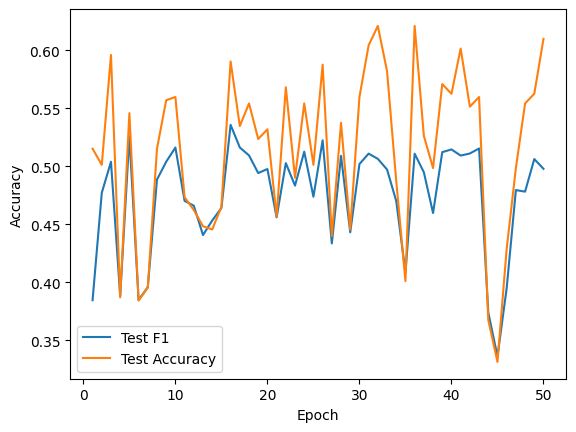

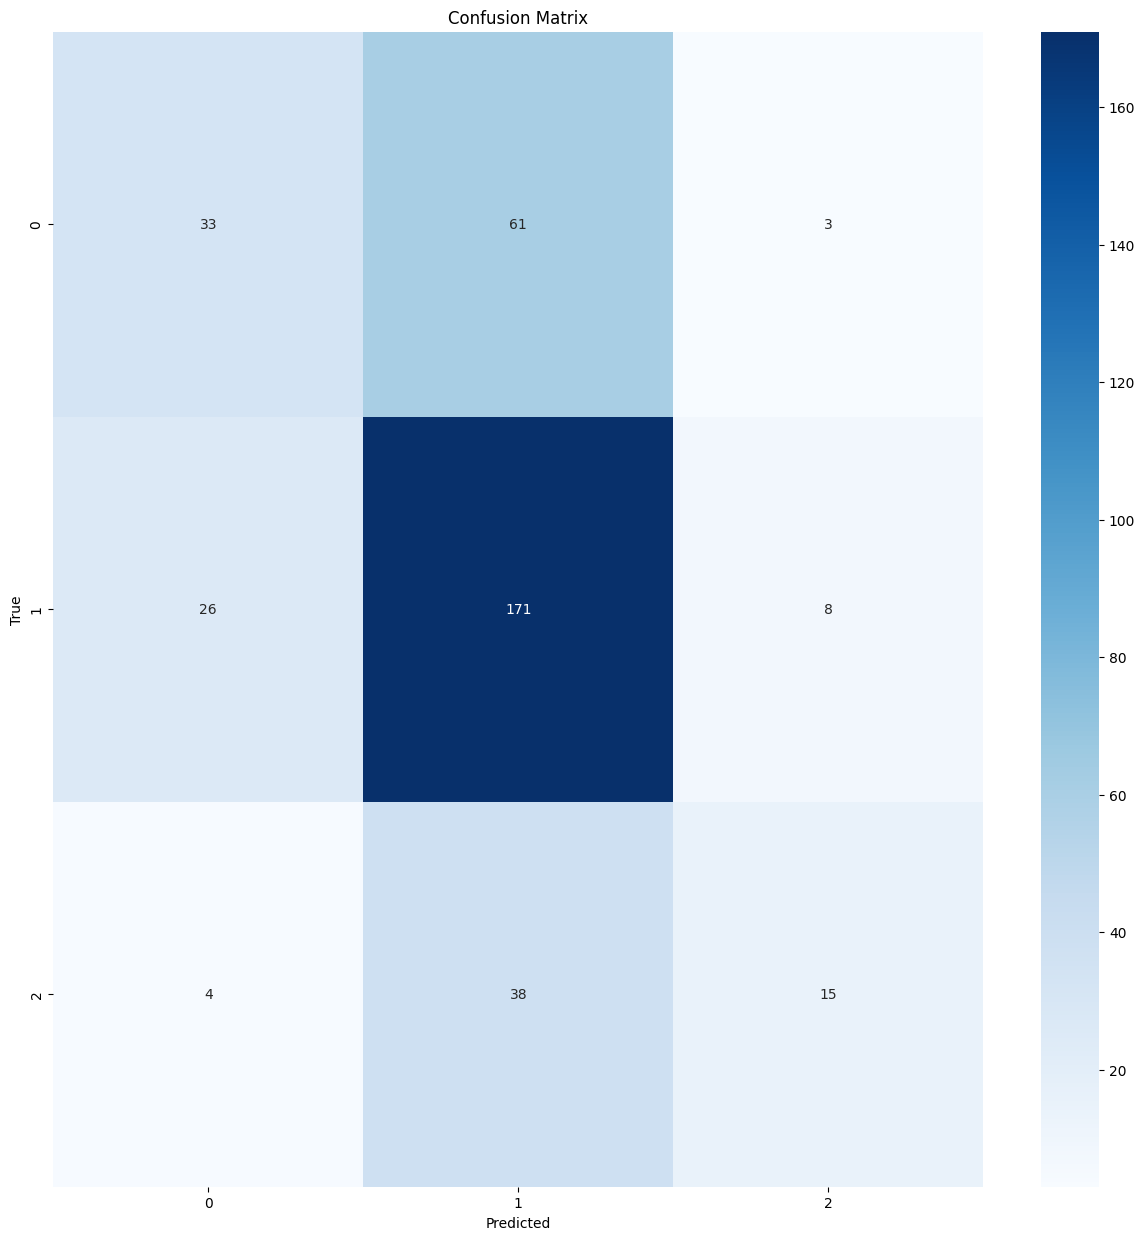

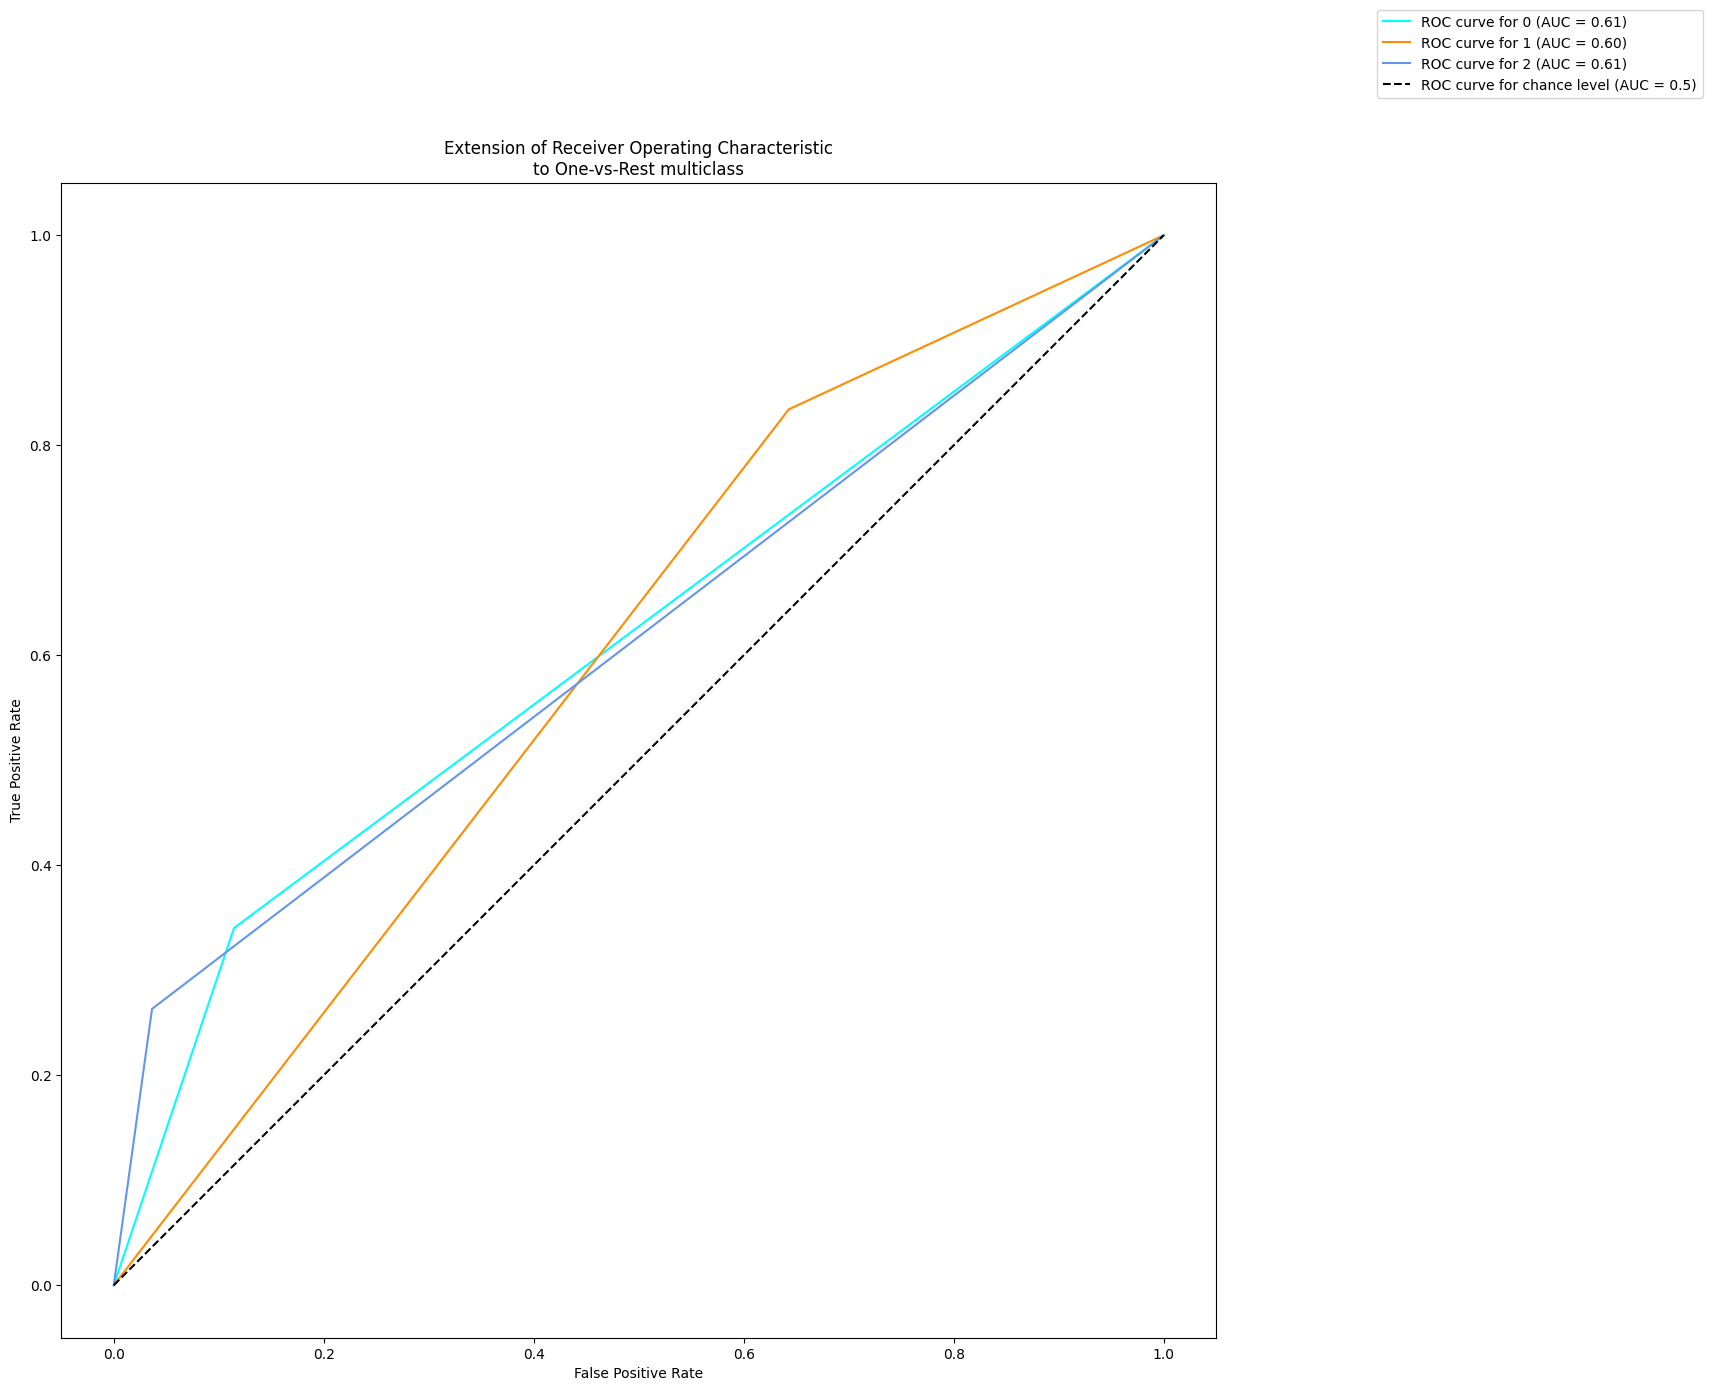

              precision    recall  f1-score   support

           0       0.52      0.34      0.41        97
           1       0.63      0.83      0.72       205
           2       0.58      0.26      0.36        57

    accuracy                           0.61       359
   macro avg       0.58      0.48      0.50       359
weighted avg       0.59      0.61      0.58       359



In [9]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=50, multilabel=multilabel, report=True)

Training Late Fusion Model:
Model Memory Usage: 1.19 MB
The number of parameters of the model are: 312067


STAGE:2024-02-25 14:46:17 326764:326764 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/50 - Test Accuracy: 0.3315, macro-f1: 0.3309
Epoch 1/50 - Training Time: 0.62 seconds | Inference Time: 0.41 seconds
Epoch 2/50 - Test Accuracy: 0.4429, macro-f1: 0.4286
Epoch 2/50 - Training Time: 0.62 seconds | Inference Time: 0.40 seconds
Epoch 3/50 - Test Accuracy: 0.4624, macro-f1: 0.4553
Epoch 3/50 - Training Time: 0.59 seconds | Inference Time: 0.40 seconds
Epoch 4/50 - Test Accuracy: 0.5237, macro-f1: 0.4992
Epoch 4/50 - Training Time: 0.61 seconds | Inference Time: 0.38 seconds
Epoch 5/50 - Test Accuracy: 0.4652, macro-f1: 0.4598
Epoch 5/50 - Training Time: 0.62 seconds | Inference Time: 0.39 seconds
Epoch 6/50 - Test Accuracy: 0.4986, macro-f1: 0.4848
Epoch 6/50 - Training Time: 0.62 seconds | Inference Time: 0.41 seconds
Epoch 7/50 - Test Accuracy: 0.5153, macro-f1: 0.4864
Epoch 7/50 - Training Time: 0.62 seconds | Inference Time: 0.39 seconds
Epoch 8/50 - Test Accuracy: 0.5404, macro-f1: 0.5048
Epoch 8/50 - Training Time: 0.62 seconds | Inference Time: 0.40 seconds


STAGE:2024-02-25 14:47:12 326764:326764 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-25 14:47:12 326764:326764 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        59.87%       19.406s        60.12%       19.488s      12.573ms       1.62 Gb       1.62 Gb          1550  
                                         training_batch         5.47%        1.773s        39.71%       12.870s       8.876ms      -1.62 Gb      -1.63 Gb          1450  
                              Optimizer.step#AdamW.step         3.19%        1.033s        15.33%        4.968s       4.320ms       2.38 Mb      -2.67

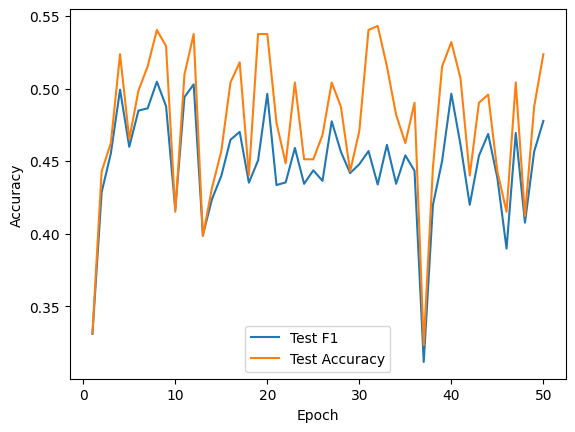

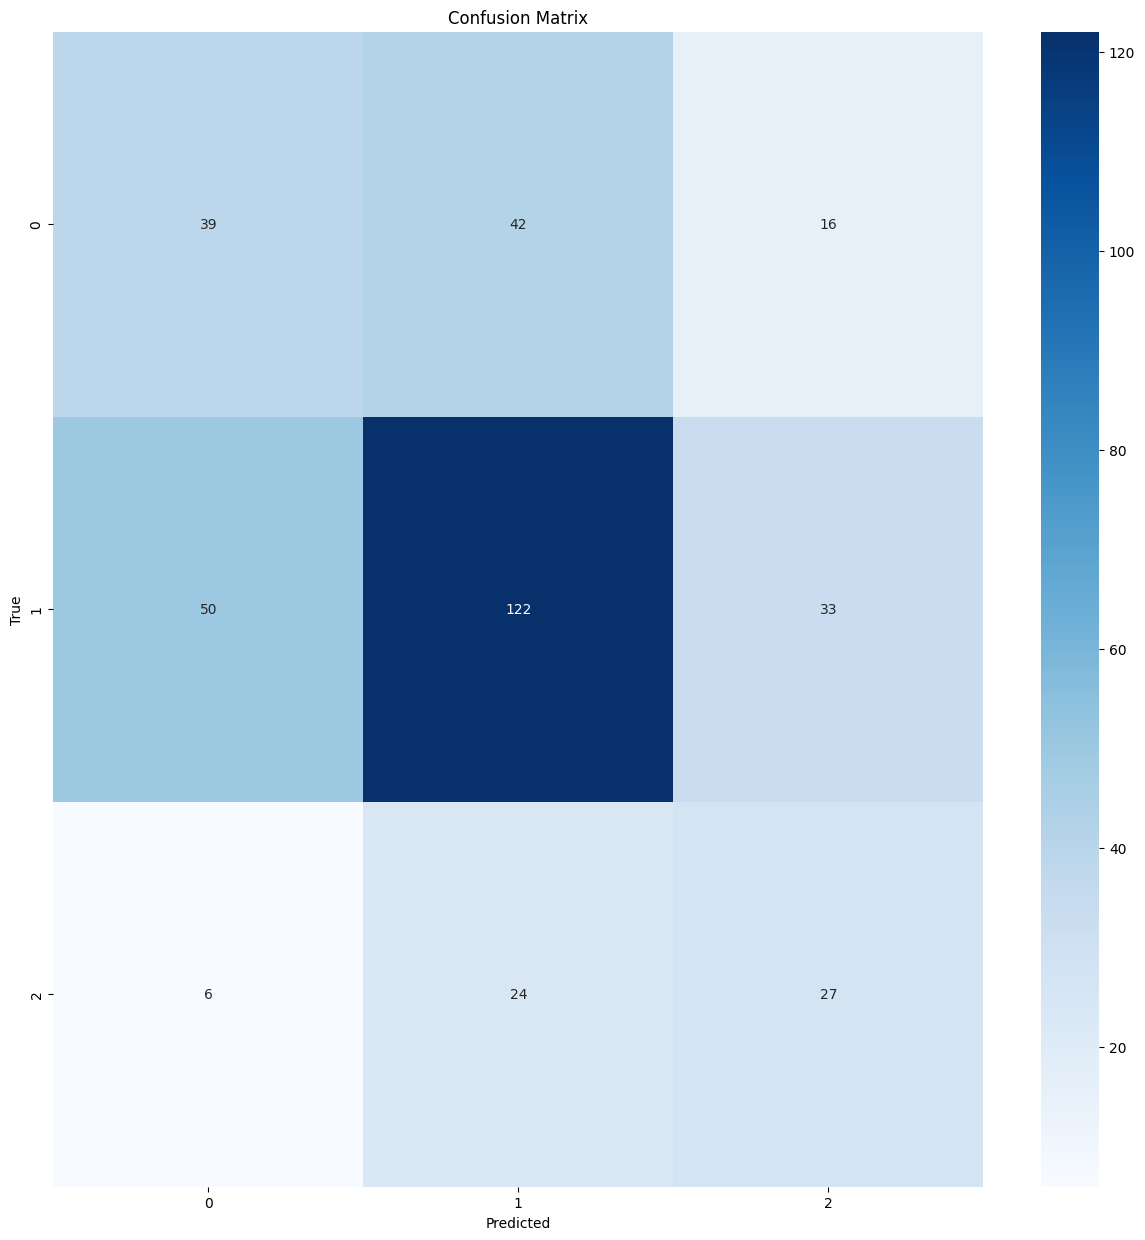

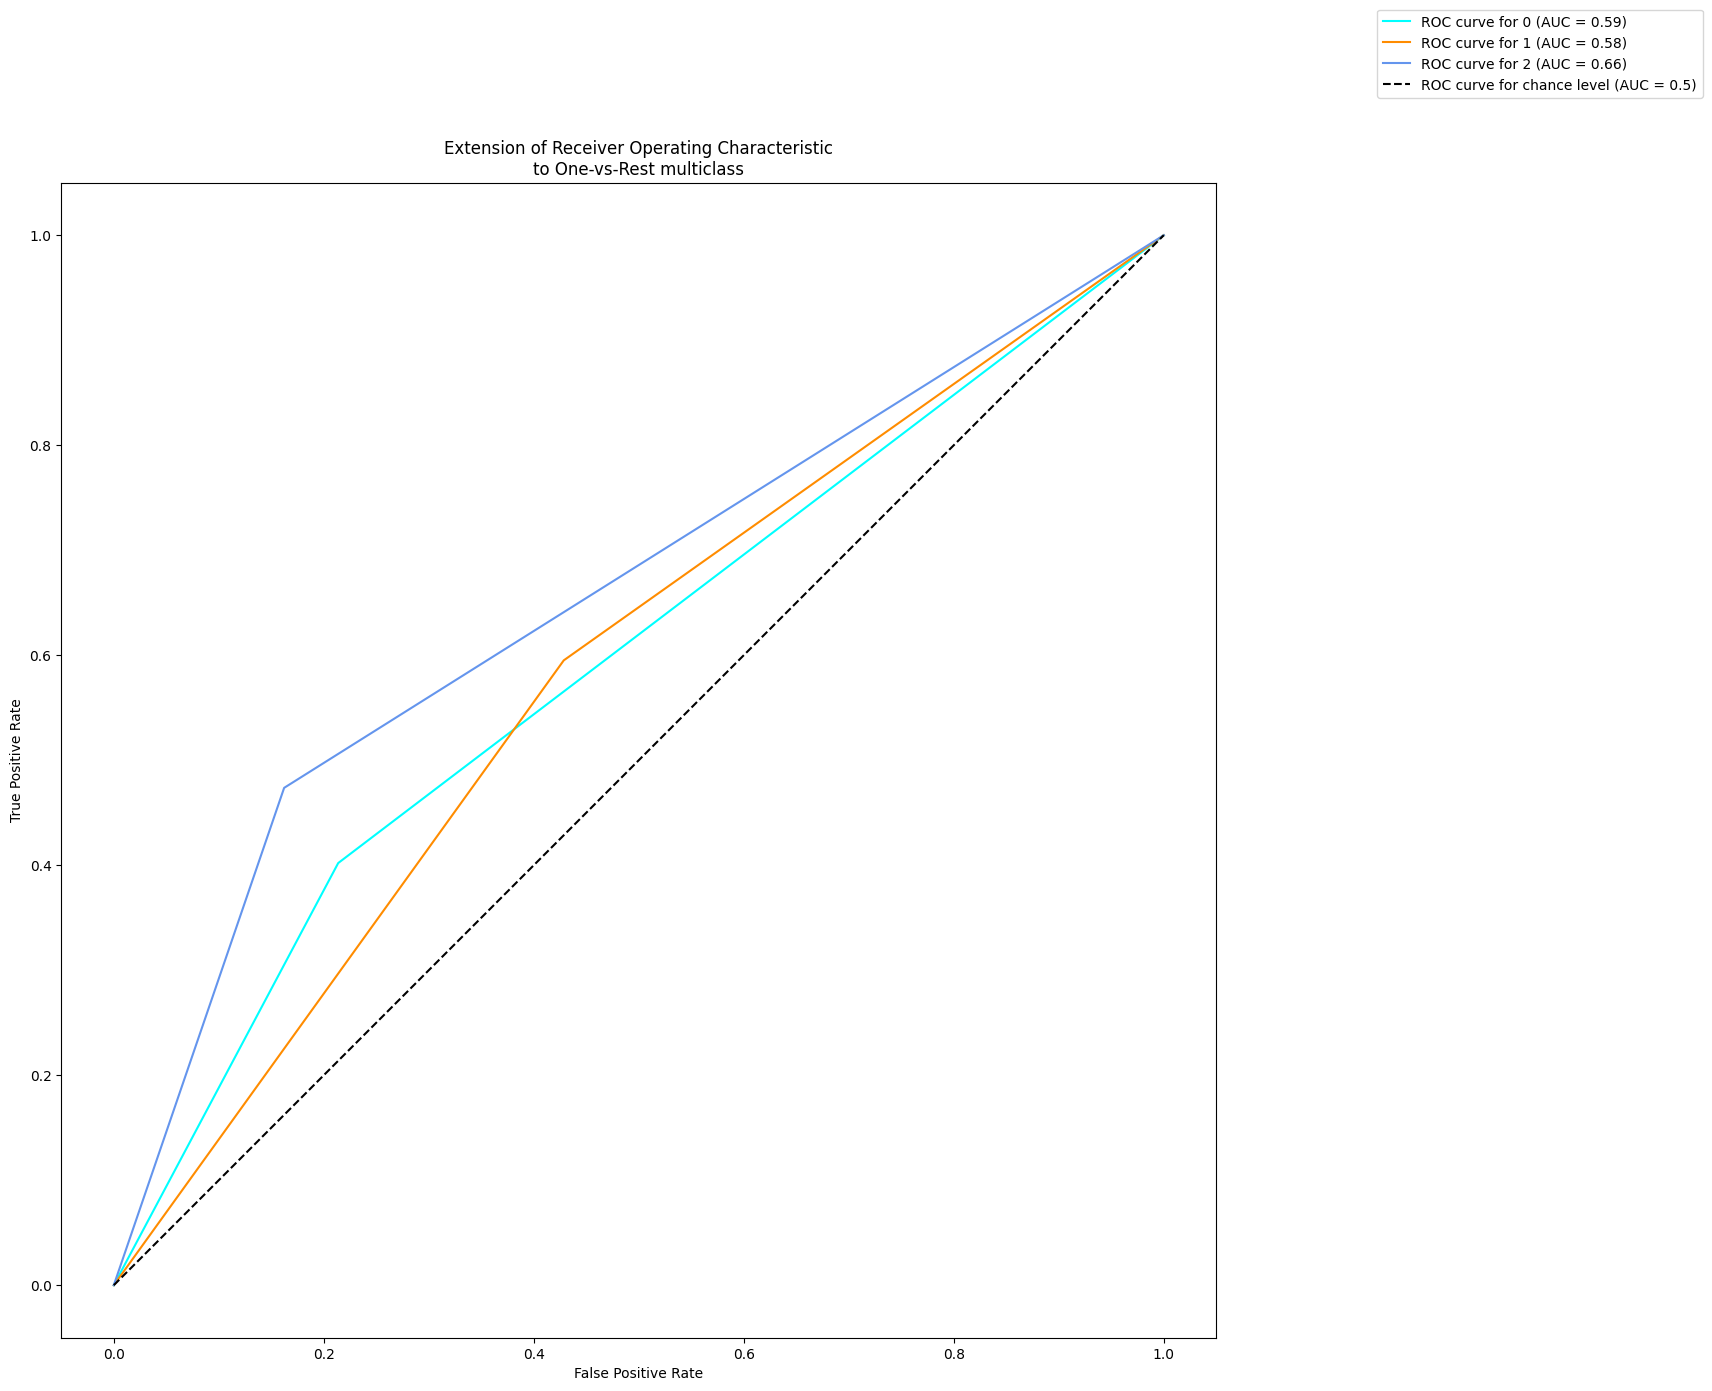

              precision    recall  f1-score   support

           0       0.41      0.40      0.41        97
           1       0.65      0.60      0.62       205
           2       0.36      0.47      0.41        57

    accuracy                           0.52       359
   macro avg       0.47      0.49      0.48       359
weighted avg       0.54      0.52      0.53       359



In [10]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=50, multilabel=multilabel, report=True)